<a href="https://colab.research.google.com/github/isegura/PLN-tema1/blob/main/practica1_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica

A partir del siguiente dataset, que contiene descripciones de proyectos europeos, se pide:

- Realiza las tareas que consideres necesarias para disminuir la variabilidad de los textos. Puedes usar nltk o spacy.

- Implementa su modelo de bolsa de palabras.

- Implementa su modelo basado en tf-idf.



Primero descarga el fichero EUproject.xlsx de aula global. Ahora súbelo a este notebook, ejecutando la siguiente celda. Tardará unos minutos...

In [1]:
from google.colab import files
uploaded = files.upload()


Saving EUproject.xlsx to EUproject (1).xlsx


El fichero se habrá guardado en /content/. Vamos a cargarlo con pandas:


In [2]:
import pandas as pd
df_excel = pd.read_excel("/content/EUproject.xlsx")
df_excel.head()

,title,description,Nivel_1
0,‘Till Death Us Do Part’: The Comparative Histo...,This project offers new complex analysis of th...,['social sciences']
1,Development and Manufacture Scoop Intake and C...,B.1.1 Concept and Objectives The concept of th...,NaN
2,Contribution of Compact Neighbourhoods to Soci...,This research investigates how compact urban f...,NaN
3,Archives of Early Human Occupation in Western ...,"""A number of important archaeological sites wi...","['social sciences', 'humanities']"
4,Design and Expansion Turbine for Domestic Refr...,This proposal for a Marie Curie Intra-European...,['natural sciences']


Crea un nuevo campo en el dataframe, que se la concatenación del campo title y del campo description. Creamos un nuevo dataset que sólo contiene esa columna.


In [6]:
df_excel["text"] = df_excel["title"].fillna("") + " " + df_excel["description"].fillna("")
df = df_excel[["text"]].copy()
print(df.head())


                                                text
0  ‘Till Death Us Do Part’: The Comparative Histo...
1  Development and Manufacture Scoop Intake and C...
2  Contribution of Compact Neighbourhoods to Soci...
3  Archives of Early Human Occupation in Western ...
4  Design and Expansion Turbine for Domestic Refr...


Durante el desarrollo, trabaja únicamente con una pequeña muestra (por ejemplo, los 10 primeros). Cuando ya tengas todo el código, ejecutalo para todo el dataset.


In [7]:
df = df.head(100)


## 1. Preprocesamiento

Implementa código para que los textos del dataframe sean preprocesados. Este código debería:
- eliminar stopwords, signos de puntuación, números, dobles comillas y paréntesis.
- aplicar lematización
- eliminar palabras cuyo lema sean muy cortos (<=2).

El dataframe debe contener una nueva columna, llamada cleaned_text, que tenga el texto preprocesado.


In [8]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")  # más rápido

def clean_text(text: str) -> str:
    if pd.isna(text):
        return ""

    doc = nlp(str(text))

    tokens = []
    for tok in doc:
        # Filtramos tokens que no aportan semántica
        if tok.is_stop or tok.is_punct or tok.is_space or tok.like_num or tok.is_quote or tok.is_bracket:         # stopwords
            continue

        lemma = tok.lemma_.lower().strip()

        if not lemma:
            continue
        if len(lemma) <= 2:
            continue

        tokens.append(lemma)

    return " ".join(tokens)

df["cleaned_text"] = df["text"].apply(clean_text)
df.head()

,text,cleaned_text
0,‘Till Death Us Do Part’: The Comparative Histo...,till death comparative history domestic homici...
1,Development and Manufacture Scoop Intake and C...,development manufacture scoop intake channel i...
2,Contribution of Compact Neighbourhoods to Soci...,contribution compact neighbourhoods social sus...
3,Archives of Early Human Occupation in Western ...,archive early human occupation western europe ...
4,Design and Expansion Turbine for Domestic Refr...,design expansion turbine domestic refrigerator...


## Wordcloud

- Genera una nube de palabras (WordCloud) a partir de los textos originales del dataset.
- Genera una nube de palabras (WordCloud) a partir de los textos preprocesados del dataset.

- Además, muestra las 20 palabras más comunes. Considera los textos sin preprocesar, y luego los textos ya preprocesados.



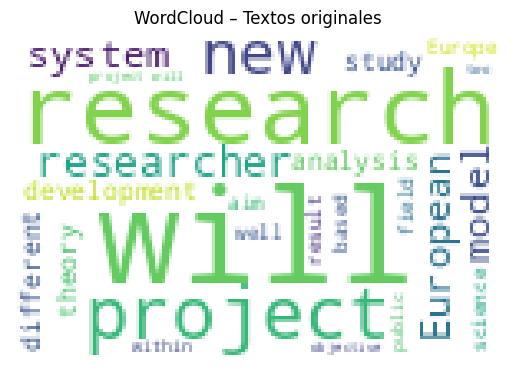

In [37]:
from wordcloud import WordCloud
text_all = " ".join(df["text"])
wc = WordCloud(width=150, height=100, background_color="white").generate(text_all)

plt.imshow(wc)
plt.axis("off")
plt.title("WordCloud – Textos originales", fontsize=12)
plt.show()

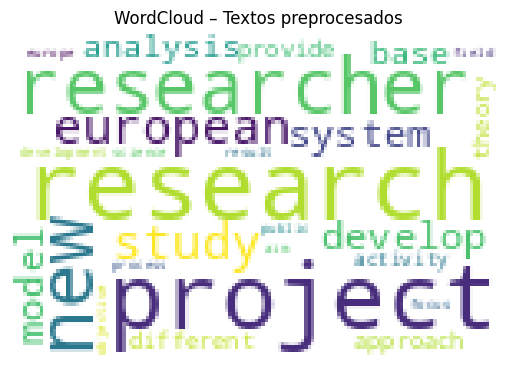

In [36]:
text_all = " ".join(df["cleaned_text"])
wc = WordCloud(width=150, height=100, background_color="white").generate(text_all)
plt.imshow(wc)
plt.axis("off")
plt.title("WordCloud – Textos preprocesados", fontsize=12)
plt.show()

Además, muestra las 20 palabras más comunes. Considera los textos sin preprocesar, y luego los textos ya preprocesados.

In [43]:
from collections import Counter

raw_words = " ".join(df["text"].dropna()).lower().split()
clean_words = " ".join(df["cleaned_text"].dropna()).split()

print("20 palabras más comunes en los textos no preprocesados:", Counter(raw_words).most_common(20))
print("20 palabras más comunes en los textos  preprocesados:", Counter(clean_words
).most_common(20))



20 palabras más comunes en los textos no preprocesados: [('the', 2019), ('of', 1381), ('and', 1136), ('to', 754), ('in', 715), ('a', 495), ('will', 342), ('is', 303), ('for', 237), ('on', 220), ('with', 200), ('this', 199), ('research', 194), ('that', 176), ('as', 170), ('be', 166), ('by', 162), ('project', 142), ('are', 124), ('an', 118)]
20 palabras más comunes en los textos  preprocesados: [('research', 212), ('project', 177), ('new', 90), ('researcher', 88), ('european', 86), ('study', 78), ('system', 75), ('develop', 71), ('public', 68), ('model', 63), ('analysis', 60), ('development', 57), ('aim', 57), ('europe', 53), ('base', 51), ('approach', 51), ('different', 49), ('theory', 49), ('provide', 48), ('activity', 48)]


## Distribución del tamaño de los textos (tokens)

Calcula la longitud de los textos en caracteres y en palabras, antes y después del preprocesamiento, y muestra sus estadísticas básicas.

En concreto:
 - el número de caracteres del texto original,
 - el número de palabras del texto sin preprocesar y
 - el número de palabras tras el preprocesamiento.

 Finalmente, muestra un resumen estadístico de estas variables para analizar el impacto de la limpieza del texto.

 Además, crea histogramas y boxplots para comparar el número de palabras de los textos originales y de los textos preprocesados.

In [38]:
df["len_chars"] = df["text"].str.len()
df["len_words_raw"] = df["text"].str.split().str.len()
df["len_words_clean"] = df["cleaned_text"].str.split().str.len()

df[["len_chars", "len_words_raw", "len_words_clean"]].describe()


,len_chars,len_words_raw,len_words_clean
count,100.000000,100.000000,100.000000
mean,1823.610000,271.830000,152.420000
std,337.453503,50.115433,28.522959
min,556.000000,89.000000,44.000000
25%,1674.750000,241.000000,139.500000
50%,1988.500000,291.000000,161.000000
75%,2039.250000,305.250000,169.250000
max,2571.000000,387.000000,211.000000


Intrepretación:

Respecto a la longitud en carácteres de los textos originales:

- La longitud media de los textos es de 1824 caracteres, con una desviación estándar moderada (337 caracteres).

- La mayoría de los textos tienen entre 1675 y 2039 (entre el primer y tercer cuartil) caracteres, lo que indica una longitud relativamente homogénea.

- El documento más corto tiene 556 caracteres y el más largo 2 571, mostrando cierta variabilidad, pero sin valores extremos problemáticos.

Respecto al número de palabras sin preprocesar (len_words_raw):

- Los textos originales contienen una media de 272 palabras, con una desviación estándar de 50 palabras. El rango va desde 89 hasta 387 palabras.

- El 50 % de los textos tienen entre 241 y 305 palabras (entre primer y tercer cuartil), lo que confirma un tamaño bastante consistente.



Respecto al número de palabras tras el preprocesamiento (len_words_clean):

- Tras la limpieza (eliminación de stopwords, signos de puntuación, números y lematización), la longitud media se reduce a 152 palabras. Esto supone una reducción aproximada del 44 % respecto al texto original.

- La variabilidad también disminuye (desviación estándar de 28.5 palabras), lo que indica que el preprocesamiento homogeneiza los textos.

Por tanto, podemos afirmar que el preprocesamiento reduce de forma significativa la longitud de los textos.

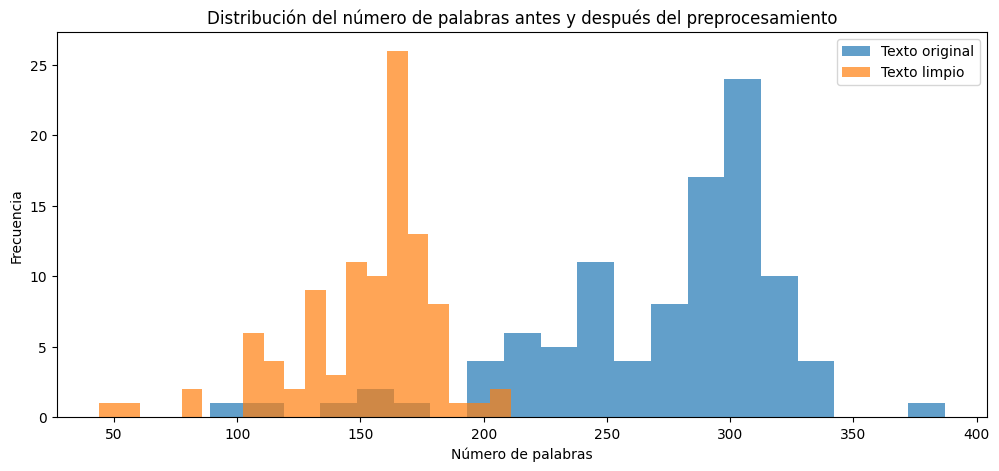

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.hist(df["len_words_raw"], bins=20, alpha=0.7, label="Texto original")
plt.hist(df["len_words_clean"], bins=20, alpha=0.7, label="Texto limpio")

plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.title("Distribución del número de palabras antes y después del preprocesamiento")
plt.legend()
plt.show()

Desplazamiento a la izquierda (reducción de longitud)

El histograma del texto limpio está claramente desplazado hacia la izquierda respecto al original.

Esto indica que, tras el preprocesamiento, los documentos contienen menos palabras, coherente con la eliminación de stopwords, puntuación y números, y con la lematización.

Menor dispersión tras el preprocesamiento

El texto original presenta una distribución más amplia, con documentos que alcanzan valores cercanos a 400 palabras.

En cambio, el texto limpio se concentra aproximadamente entre 100 y 180 palabras, mostrando una menor variabilidad.

Esto confirma que el preprocesamiento homogeneiza la longitud de los documentos.

Reducción del solapamiento extremo

Aunque existe cierto solapamiento entre ambas distribuciones, las colas largas del texto original prácticamente desaparecen en el texto limpio.

Esto sugiere que el preprocesamiento elimina principalmente palabras funcionales y redundantes, sin distorsionar la estructura general del corpus.

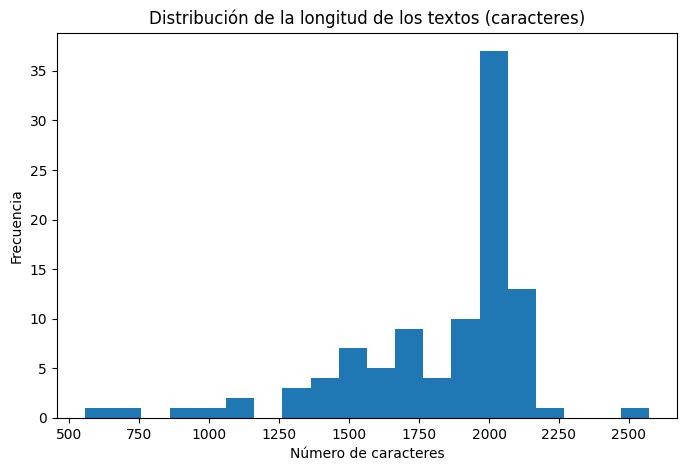

In [40]:
plt.figure(figsize=(8, 5))

plt.hist(df["len_chars"], bins=20)

plt.xlabel("Número de caracteres")
plt.ylabel("Frecuencia")
plt.title("Distribución de la longitud de los textos (caracteres)")
plt.show()

/tmp/ipython-input-2651414559.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


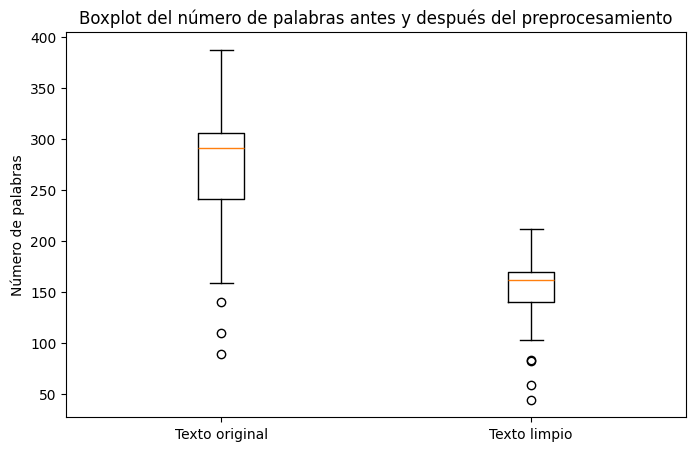

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.boxplot(
    [df["len_words_raw"], df["len_words_clean"]],
    labels=["Texto original", "Texto limpio"],
    showfliers=True
)

plt.ylabel("Número de palabras")
plt.title("Boxplot del número de palabras antes y después del preprocesamiento")
plt.show()

/tmp/ipython-input-942188801.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df["len_chars"], labels=["Caracteres"], showfliers=True)


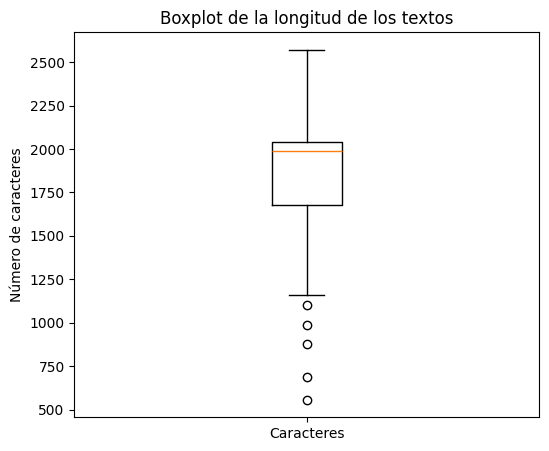

In [42]:
plt.figure(figsize=(6, 5))

plt.boxplot(df["len_chars"], labels=["Caracteres"], showfliers=True)

plt.ylabel("Número de caracteres")
plt.title("Boxplot de la longitud de los textos")
plt.show()

## 2. Modelo bolsa de palabras

Construye un modelo de Bolsa de Palabras (Bag of Words) a partir del conjunto de textos.
Genera el vocabulario correspondiente al texto original y al texto preprocesado, e indica el tamaño de cada vocabulario para analizar el efecto del preprocesamiento.

Analiza la reducción del vocabulario producida por el preprocesamiento del texto.
Calcula el número y el porcentaje de palabras eliminadas y muestra qué términos han sido descartados durante el proceso de limpieza.


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_raw = CountVectorizer(lowercase=True,)
X_text = vectorizer_raw.fit_transform(df["text"])
vocabulary_raw = set(vectorizer_raw.get_feature_names_out())
print("Vocabulario (sin preprocesamiento): ", vocabulary_raw)
print("Tamaño del vocabulario (sin preprocesamiento): ", len(vocabulary_raw))
print()

vectorizer_clean = CountVectorizer(lowercase=True,)
X_cleaned_text = vectorizer_clean.fit_transform(df["cleaned_text"])
vocabulary_clean = set(vectorizer_clean.get_feature_names_out())
print("Vocabulario (con preprocesamiento): ", vocabulary_clean)
print("Tamaño del vocabulario (con preprocesamiento): ", len(vocabulary_clean))




Vocabulario (sin preprocesamiento):  {'composite', 'arrest', 'breakthrough', 'award', 'measures', 'sorption', 'same', 'vivo', 'selecting', 'modelling', 'benefited', 'surfaces', 'accompany', 'dissecting', 'welfare', 'directed', 'lness', 'specialists', 'antarctic', 'debate', 'decided', 'withstanding', 'funding', 'enables', 'after', 'algebro', 'comparing', 'functionalities', 'most', 'software', 'top', 'mea', 'walloon', 'expansions', 'universities', 'structures', 'discrete', 'critical', 'venue', 'analyzed', 'advisor', 'chemistry', 'influential', 'qualities', 'bear', 'vibrant', 'eso', 'especially', '18', 'on', 'argument', 'rotating', 'oh', 'mislead', 'enlightenment', 'basis', 'yugoslavian', 'discontinuities', 'geometric', 'supplying', 'enable', 'sociology', 'general', 'empirical', 'types', 'prophet', 'wp5', 'reporter', 'flanders', 'unfolding', 'dpp', 'operators', 'ties', 'procentrioles', 'unequal', 'gender', 'raging', 'redefine', '2013', 'observed', 'regulator', 'moving', 'components', 'con

In [16]:
# --- Reducción del vocabulario ---
reduction = len(vocabulary_raw) - len(vocabulary_clean)
reduction_pct = reduction / len(vocabulary_raw) * 100

print("Reducción del vocabulario:")
print(f"- Palabras eliminadas: {reduction}")
print(f"- Reducción porcentual: {reduction_pct:.2f}%")
print()

# --- Palabras eliminadas ---
removed_words = sorted(vocabulary_raw - vocabulary_clean)

print("Palabras eliminadas durante el preprocesamiento:")
print(removed_words)
print("Número de palabras eliminadas:", len(removed_words))

Reducción del vocabulario:
- Palabras eliminadas: 1135
- Reducción porcentual: 24.08%

Palabras eliminadas durante el preprocesamiento:
['000', '10', '100', '12', '120', '125', '147', '1492', '150', '160', '1730', '1736', '18', '18th', '1949', '1971', '20', '200', '2004', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2016', '2017', '210', '2200', '24', '25', '250', '27', '27th', '28', '28th', '30', '300', '3d', '40', '400', '50', '500', '5000', '5400', '5650', '60', '75', '780', '800', '8000', '850', '976', 'about', 'above', 'abridged', 'absorbers', 'accessions', 'accommodating', 'according', 'accounted', 'accounting', 'accounts', 'accreting', 'achieved', 'achievements', 'achieving', 'acknowledges', 'acquired', 'acquires', 'across', 'acted', 'acting', 'actions', 'activates', 'activists', 'activities', 'actors', 'acts', 'ad', 'adapted', 'added', 'addressed', 'addresses', 'addressing', 'adopted', 'adopts', 'advancements', 'advances', 'advantages', 'adverting', 'affecte

## Modelo TF-IDF

Construye el modelo tf-idf a partir de los textos preprocesados.

Identifica los términos más relevantes del corpus utilizando la representación TF-IDF.
Estos términos no son necesariamente los más frecuentes, sino aquellos que presentan un mayor valor medio de TF-IDF, lo que indica una mayor capacidad discriminativa dentro del corpus.


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df["cleaned_text"])


In [46]:
import numpy as np

feature_names = tfidf.get_feature_names_out()

# Calcula la media en cada columna (es decir, en cada término)
mean_tfidf = X_tfidf.mean(axis=0).A1

top_terms = sorted(
    zip(feature_names, mean_tfidf),
    key=lambda x: x[1],
    reverse=True
)[:20]

top_terms


[('research', np.float64(0.04439072083354734)),
 ('researcher', np.float64(0.03383432736177539)),
 ('project', np.float64(0.03297909519617276)),
 ('public', np.float64(0.024883082912003023)),
 ('european', np.float64(0.02474353801797364)),
 ('new', np.float64(0.02370982042710976)),
 ('system', np.float64(0.023252910225107466)),
 ('analysis', np.float64(0.020177676542344796)),
 ('night', np.float64(0.020114593398065886)),
 ('theory', np.float64(0.019985272017047685)),
 ('model', np.float64(0.019943383071111126)),
 ('study', np.float64(0.019932624535659336)),
 ('science', np.float64(0.01901231457722267)),
 ('develop', np.float64(0.018433796978673606)),
 ('activity', np.float64(0.01797557646543092)),
 ('scientific', np.float64(0.01778286681642784)),
 ('programme', np.float64(0.017068954482526558)),
 ('europe', np.float64(0.016712670576667903)),
 ('approach', np.float64(0.01659275092898644)),
 ('development', np.float64(0.01655505316353988))]

## Localizar conceptos multipalabras relevantes

Construye un modelo de Bolsa de Palabras basado en bigramas y trigramas (usa la clase CountVectorizer) a partir del texto limpio y muestra los primeros 20 n-gramas del vocabulario generado.

In [48]:
vectorizer_ng = CountVectorizer(ngram_range=(2, 3))
X_ng = vectorizer_ng.fit_transform(df["cleaned_text"])

vectorizer_ng.get_feature_names_out()[:20]

array(['15 4a', '15 4a uwb', '2020 br', '2020 br cofet', '2020 br the',
       '474te co2', '474te co2 emission', '4a uwb', '4a uwb standard',
       '802 15', '802 15 4a', 'abate benefit', 'abate benefit unique',
       'abatement technology', 'abatement technology area',
       'abd excellence', 'abd excellence knowledge', 'ability return',
       'ability return home', 'ability self'], dtype=object)

## Topic Modeling (LDA)

Identifica los temas latentes presentes en el corpus utilizando Latent Dirichlet Allocation (LDA).

Aplica un modelo de Topic Modeling mediante Latent Dirichlet Allocation (LDA) al conjunto de textos.



In [57]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_tfidf)

def show_topics(model, feature_names, n_top_words=10):
    for i, topic in enumerate(model.components_):
        print(f"Topic {i}:")
        print([feature_names[j] for j in topic.argsort()[-n_top_words:]])
        print()

show_topics(lda, tfidf.get_feature_names_out())

Topic 0:
['space', 'project', 'night', 'researcher', 'cultural', 'social', 'activity', 'soil', 'research', 'public']

Topic 1:
['night', 'hamburg', 'project', 'analysis', 'climate', 'violence', 'mobility', 'research', 'new', 'researcher']

Topic 2:
['colour', 'approach', 'patent', 'researcher', 'evolution', 'epigenetic', 'project', 'system', 'particle', 'research']

Topic 3:
['gambling', 'material', 'ring', 'model', 'research', 'wave', 'metal', 'plan', 'market', 'energy']

Topic 4:
['player', 'detachment', 'concept', 'project', 'power', 'energy', 'system', 'fet', 'centriole', 'research']

